In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from sklearn.svm import SVC 

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,auc,roc_auc_score

In [8]:
%matplotlib inline

In [43]:
transDF=pd.read_csv("../../creditcard.csv")

In [44]:
transDF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


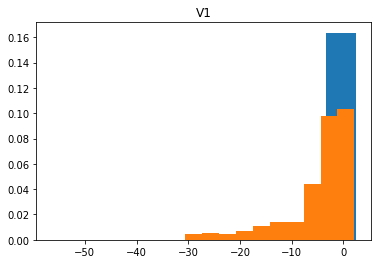

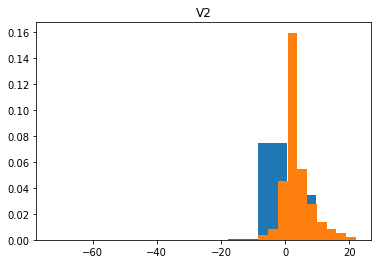

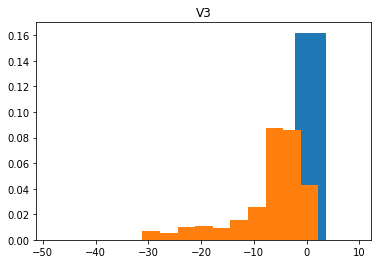

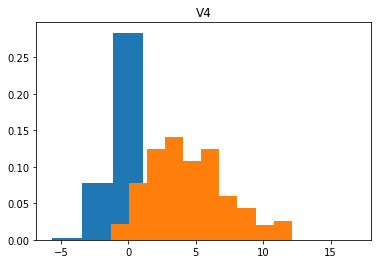

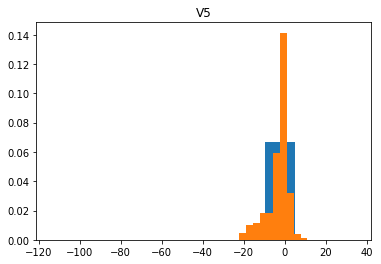

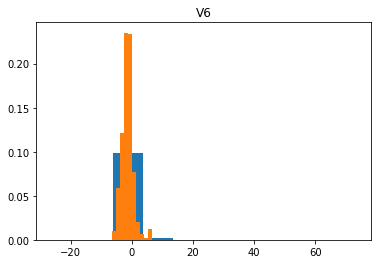

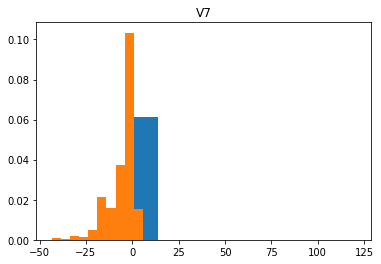

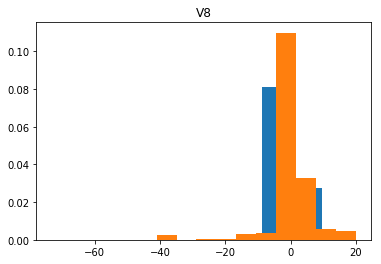

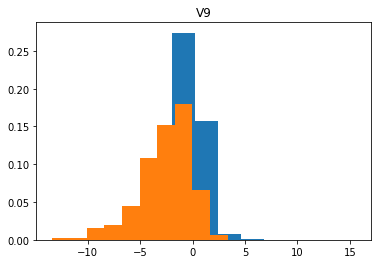

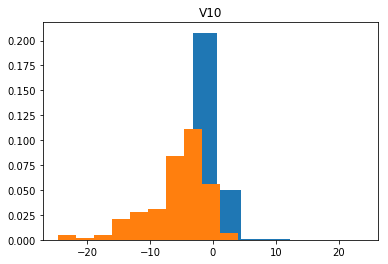

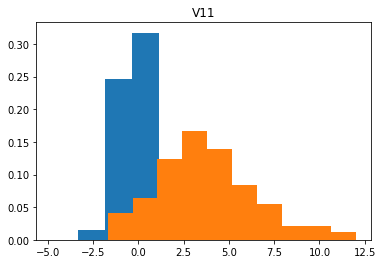

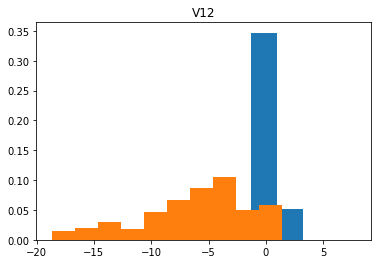

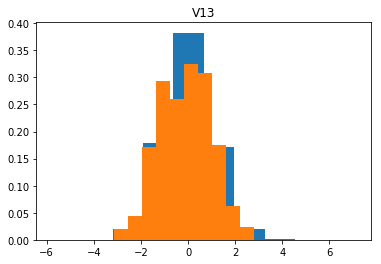

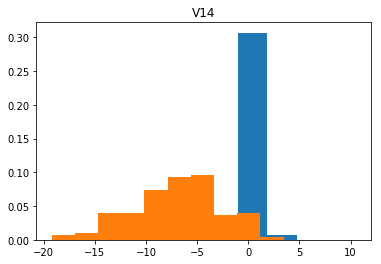

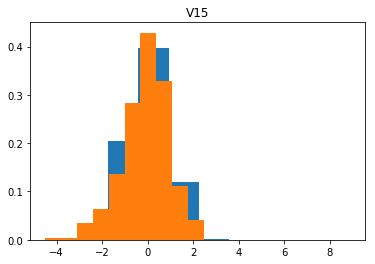

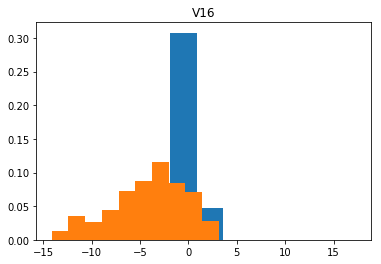

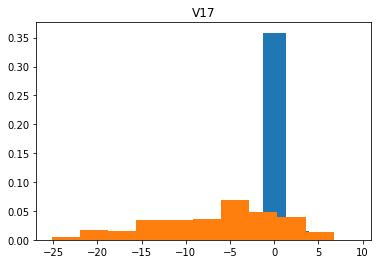

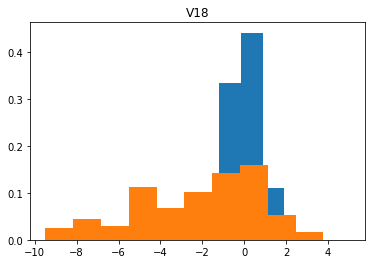

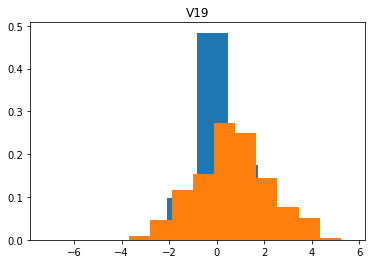

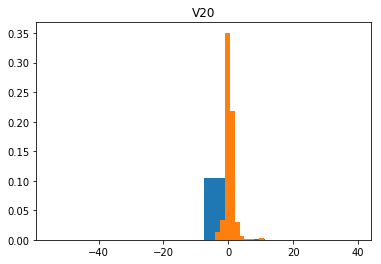

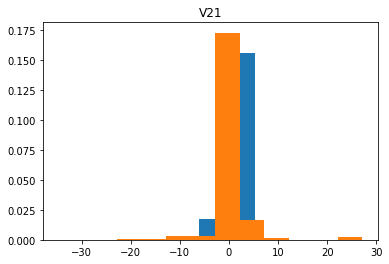

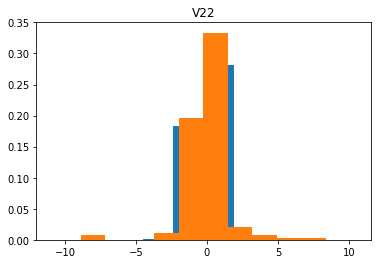

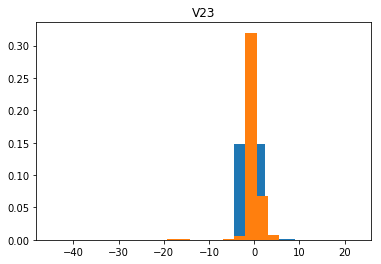

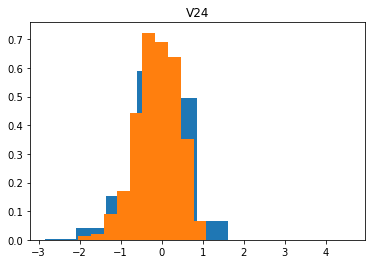

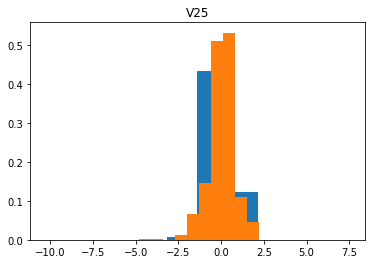

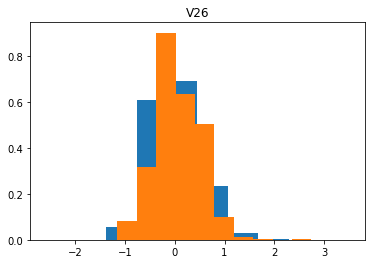

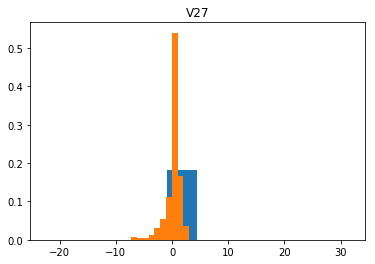

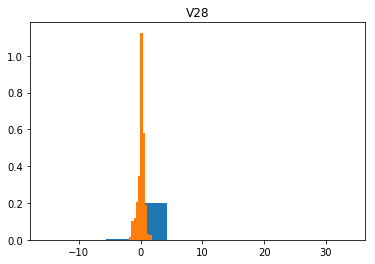

In [45]:
cols=transDF.columns
for i in range(0,28):
    plt.hist(transDF.loc[transDF.Class==0,cols[i+1]],normed=True)
    plt.hist(transDF.loc[transDF.Class==1,cols[i+1]],normed=True)
    plt.title(cols[i+1])
    plt.show()

In [46]:
transDF.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [47]:
transDF.Class.sum(),(transDF.Class.sum()/transDF.Class.count())*100

(492, 0.1727485630620034)

So there are 284807 transactions with 492 fraudulent ones; i.e. 0.2% of samples are fraudulent

In [48]:
transFraudDF=transDF[transDF.Class==1]
transFraudCount=transFraudDF.Class.count()
transNotFraudDF=transDF[transDF.Class==0]
transNotFraudCount=transNotFraudDF.Class.count()
print(transFraudCount,transNotFraudCount)

492 284315


In [49]:
list(zip(transDF.min(),transDF.max(),transDF.mean()))

[(0.0, 172792.0, 94813.85957508067),
 (-56.407509631329, 2.45492999121121, 3.919560084655042e-15),
 (-72.7157275629303, 22.0577289904909, 5.688174400270728e-16),
 (-48.3255893623954, 9.38255843282114, -8.76907126289773e-15),
 (-5.68317119816995, 16.8753440335975, 2.782312291808533e-15),
 (-113.74330671114599, 34.8016658766686, -1.5525630329923732e-15),
 (-26.1605059358433, 73.3016255459646, 2.010663493875542e-15),
 (-43.5572415712451, 120.589493945238, -1.694249132734738e-15),
 (-73.21671845526741, 20.0072083651213, -1.9270277088072758e-16),
 (-13.4340663182301, 15.5949946071278, -3.13702431282631e-15),
 (-24.5882624372475, 23.7451361206545, 1.7686271795410151e-15),
 (-4.79747346479757, 12.018913181619899, 9.170318143978346e-16),
 (-18.683714633344298, 7.8483920756445995, -1.81065810647492e-15),
 (-5.7918812063208405, 7.126882958593759, 1.6934380232611336e-15),
 (-19.2143254902614, 10.5267660517847, 1.479045358646473e-15),
 (-4.49894467676621, 8.87774159774277, 3.482336288408142e-15),


#### single train test split

In [50]:
print(cols,len(cols))
X = transDF[cols[1:30]]
y = transDF[cols[30]]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 31


Checking fraction of fradulant samples in training and test datasets

In [51]:
print(y.sum()/y.count(),y_train.sum()/y_train.count(),y_test.sum()/y_test.count())
y.sum(),y_train.sum(),y_test.sum()

0.00172748563062 0.0017415322675 0.00168534591725


(492, 372, 120)

###### linear svm classifier with no feature preprocessing

2018-05-15 10:54:35.750581
2018-05-15 12:45:19.898520


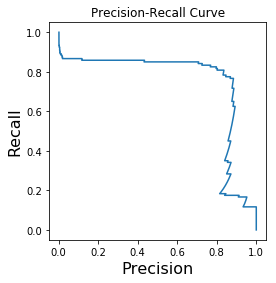

In [27]:
print(str(datetime.datetime.now()))
modelSVClin=SVC(kernel='linear',C=1)
modelSVClin.fit(X_train,y_train)
print(str(datetime.datetime.now()))

y_scores_test_SVC=modelSVClin.decision_function(X_test)
precision_SVC,recall_SVC,thresholds_SVC=precision_recall_curve(y_test,y_scores_test_SVC)

plt.plot(precision_SVC, recall_SVC)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve')
ax=plt.gca()
ax.set_aspect('equal')

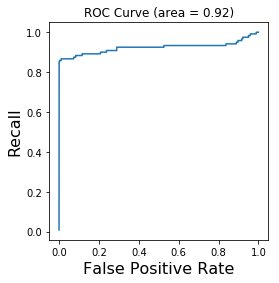

In [28]:
fpr_SVC,recall_SVC,_= roc_curve(y_test,y_scores_test_SVC)
roc_auc_SVC = auc(fpr_SVC,recall_SVC)

plt.plot(fpr_SVC, recall_SVC)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVC))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

###### linear svm classifier with minmax scaling

2018-05-15 12:45:20.986411
2018-05-15 12:45:28.170489


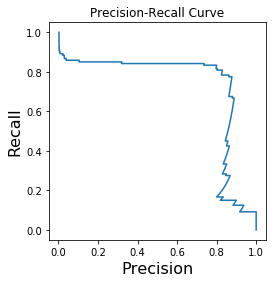

In [29]:
print(str(datetime.datetime.now()))
modelSVCScaledlin=SVC(kernel='linear',C=1)
modelSVCScaledlin.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

y_scores_test_SVC=modelSVCScaledlin.decision_function(X_test_scaled)
precision_SVC,recall_SVC,thresholds_SVC=precision_recall_curve(y_test,y_scores_test_SVC)

plt.plot(precision_SVC, recall_SVC)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve')
ax=plt.gca()
ax.set_aspect('equal')

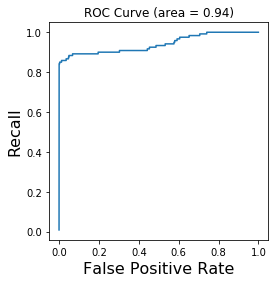

In [30]:
fpr_SVC,recall_SVC,_= roc_curve(y_test,y_scores_test_SVC)
roc_auc_SVC = auc(fpr_SVC,recall_SVC)

plt.plot(fpr_SVC, recall_SVC)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVC))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

In [31]:
grid_modelSVCScaledlin=SVC(kernel='linear',C=1)

grid_values = {'C': [0.001, 0.01, 1, 10, 100]}

print(str(datetime.datetime.now()))
grid_modelSVCScaledlin_auc = GridSearchCV(grid_modelSVCScaledlin, param_grid = grid_values, scoring = 'roc_auc')
grid_modelSVCScaledlin_auc.fit(X_train_scaled, y_train)
print(str(datetime.datetime.now()))
y_decision_fn_scores_auc = grid_modelSVCScaledlin_auc.decision_function(X_test_scaled) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_modelSVCScaledlin_auc.best_params_)
print('Grid best score (AUC): ', grid_modelSVCScaledlin_auc.best_score_)

2018-05-15 12:45:29.347341
2018-05-15 12:53:20.329862
Test set AUC:  0.953628790223
Grid best parameter (max. AUC):  {'C': 0.01}
Grid best score (AUC):  0.954398021148


###### svm classifier with no feature preprocessing

In [14]:
print(str(datetime.datetime.now()))
modelSVC=SVC()
modelSVC.fit(X_train,y_train)
print(str(datetime.datetime.now()))

2018-05-15 10:22:30.198923
2018-05-15 10:47:05.949405


Evaluating the model

In [15]:
y_predicted_train_SVC=modelSVC.predict(X_train)
y_predicted_test_SVC=modelSVC.predict(X_test)

In [16]:
print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVC))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVC))
print('train set precision =',precision_score(y_train,y_predicted_train_SVC))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVC))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVC))
print('test set precision =',precision_score(y_test,y_predicted_test_SVC))

train set sensitivity = 0.83064516129
train set accuracy = 0.999700381545
train set precision = 0.996774193548
test set sensitivity = 0.425
test set accuracy = 0.999016881548
test set precision = 0.980769230769


This has decent train set recall score but the model did not generalize well - poor test set recall score!

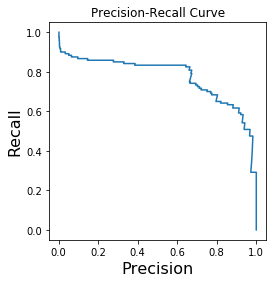

In [17]:
y_scores_test_SVC=modelSVC.decision_function(X_test)
precision_SVC,recall_SVC,thresholds_SVC=precision_recall_curve(y_test,y_scores_test_SVC)

plt.plot(precision_SVC, recall_SVC)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve')
ax=plt.gca()
ax.set_aspect('equal')

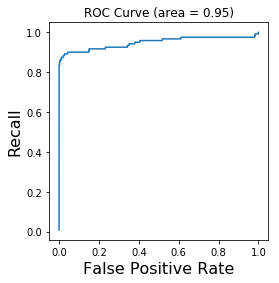

In [18]:
fpr_SVC,recall_SVC,_= roc_curve(y_test,y_scores_test_SVC)
roc_auc_SVC = auc(fpr_SVC,recall_SVC)

plt.plot(fpr_SVC, recall_SVC)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVC))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

###### svm classifier with normalized input vectors

In [52]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(str(datetime.datetime.now()))
modelSVCScaled=SVC()
modelSVCScaled.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

2018-06-04 09:22:36.563894
2018-06-04 09:22:48.792428


Evaluating the model

In [53]:
y_predicted_train_SVCScaled=modelSVCScaled.predict(X_train_scaled)
y_predicted_test_SVCScaled=modelSVCScaled.predict(X_test_scaled)

print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVCScaled))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVCScaled))
print('train set precision =',precision_score(y_train,y_predicted_train_SVCScaled))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVCScaled))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVCScaled))
print('test set precision =',precision_score(y_test,y_predicted_test_SVCScaled))

train set sensitivity = 0.561827956989
train set accuracy = 0.999087100021
train set precision = 0.867219917012
test set sensitivity = 0.591666666667
test set accuracy = 0.999171371591
test set precision = 0.876543209877


This has poor train set and test set recall score! Let's look at the AUC score. Now there are two types of curves: precision recall curves and ROC curve which is a curve of FPR recall curves and AUC score is the area under the ROC curve.

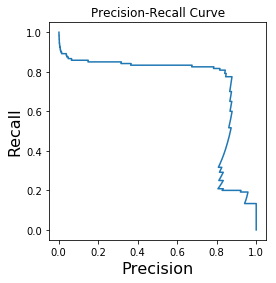

In [23]:
y_scores_test_SVCScaled=modelSVCScaled.decision_function(X_test_scaled)
precision_SVCScaled,recall_SVCScaled,thresholds_SVCScaled=precision_recall_curve(y_test,y_scores_test_SVCScaled)

plt.plot(precision_SVCScaled, recall_SVCScaled)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve')
ax=plt.gca()
ax.set_aspect('equal')

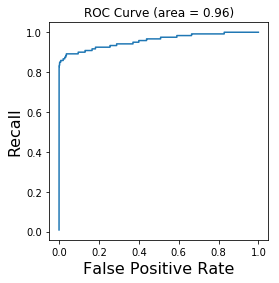

In [24]:
fpr_SVCScaled,recall_SVCScaled,_= roc_curve(y_test,y_scores_test_SVCScaled)
roc_auc_SVCScaled = auc(fpr_SVCScaled,recall_SVCScaled)

plt.plot(fpr_SVCScaled, recall_SVCScaled)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVCScaled))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

Parameter Tuning

In [25]:
grid_modelSVCScaled=SVC()

grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1]}

print(str(datetime.datetime.now()))
grid_modelSVCScaled_auc = GridSearchCV(grid_modelSVCScaled, param_grid = grid_values, scoring = 'roc_auc')
grid_modelSVCScaled_auc.fit(X_train_scaled, y_train)
print(str(datetime.datetime.now()))
y_decision_fn_scores_auc = grid_modelSVCScaled_auc.decision_function(X_test_scaled) 

2018-05-15 10:52:45.060591
2018-05-15 10:54:33.976115


In [26]:
print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_modelSVCScaled_auc.best_params_)
print('Grid best score (AUC): ', grid_modelSVCScaled_auc.best_score_)

Test set AUC:  0.95751608471
Grid best parameter (max. AUC):  {'gamma': 0.05}
Grid best score (AUC):  0.956817417616


###### svm classifier with normalized input vectors; Using Undersampling (Equal Class Ratios); 

0.5 0.494579945799 0.516260162602
492 365 127
2018-06-04 09:27:52.428195
2018-06-04 09:27:52.450509
train set sensitivity = 0.824657534247
train set accuracy = 0.913279132791
train set precision = 1.0
test set sensitivity = 0.763779527559
test set accuracy = 0.878048780488
test set precision = 1.0


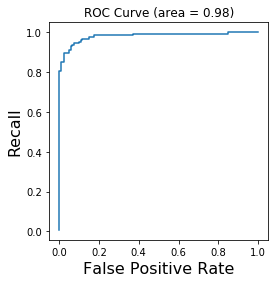

In [55]:
# Undersampling fraudulent transactions
transNotFraudUSDF=transNotFraudDF.sample(n=transFraudCount,random_state=0)

# Forming a new dataset with undersampled majority class
transNewDF=pd.concat([transNotFraudUSDF,transFraudDF])

X = transNewDF[cols[1:30]]
y = transNewDF[cols[30]]

# Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) 

# Checking fraction of fradulant samples in training and test datasets

print(y.sum()/y.count(),y_train.sum()/y_train.count(),y_test.sum()/y_test.count())
print(y.sum(),y_train.sum(),y_test.sum())

# Scaling input feature vectors
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
print(str(datetime.datetime.now()))
modelSVCScaled=SVC()
modelSVCScaled.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

# Evaluating the model
y_predicted_train_SVCScaled=modelSVCScaled.predict(X_train_scaled)
y_predicted_test_SVCScaled=modelSVCScaled.predict(X_test_scaled)

print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVCScaled))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVCScaled))
print('train set precision =',precision_score(y_train,y_predicted_train_SVCScaled))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVCScaled))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVCScaled))
print('test set precision =',precision_score(y_test,y_predicted_test_SVCScaled))

y_scores_test_SVCScaled=modelSVCScaled.decision_function(X_test_scaled)
fpr_SVCScaled,recall_SVCScaled,_= roc_curve(y_test,y_scores_test_SVCScaled)
roc_auc_SVCScaled = auc(fpr_SVCScaled,recall_SVCScaled)

plt.plot(fpr_SVCScaled, recall_SVCScaled)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVCScaled))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

###### svm classifier with normalized input vectors; Using Undersampling (1:2 Class Ratios); 

0.333333333333 0.329719963866 0.344173441734
492 365 127
2018-06-04 09:28:22.059886
2018-06-04 09:28:22.092194
train set sensitivity = 0.791780821918
train set accuracy = 0.931345980126
train set precision = 1.0
test set sensitivity = 0.779527559055
test set accuracy = 0.924119241192
test set precision = 1.0


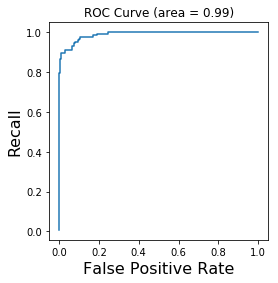

In [56]:
# Undersampling fraudulent transactions
transNotFraudUSDF=transNotFraudDF.sample(n=transFraudCount*2,random_state=0)

# Forming a new dataset with undersampled majority class
transNewDF=pd.concat([transNotFraudUSDF,transFraudDF])

X = transNewDF[cols[1:30]]
y = transNewDF[cols[30]]

# Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) 

# Checking fraction of fradulant samples in training and test datasets

print(y.sum()/y.count(),y_train.sum()/y_train.count(),y_test.sum()/y_test.count())
print(y.sum(),y_train.sum(),y_test.sum())

# Scaling input feature vectors
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
print(str(datetime.datetime.now()))
modelSVCScaled=SVC()
modelSVCScaled.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

# Evaluating the model
y_predicted_train_SVCScaled=modelSVCScaled.predict(X_train_scaled)
y_predicted_test_SVCScaled=modelSVCScaled.predict(X_test_scaled)

print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVCScaled))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVCScaled))
print('train set precision =',precision_score(y_train,y_predicted_train_SVCScaled))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVCScaled))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVCScaled))
print('test set precision =',precision_score(y_test,y_predicted_test_SVCScaled))

y_scores_test_SVCScaled=modelSVCScaled.decision_function(X_test_scaled)
fpr_SVCScaled,recall_SVCScaled,_= roc_curve(y_test,y_scores_test_SVCScaled)
roc_auc_SVCScaled = auc(fpr_SVCScaled,recall_SVCScaled)

plt.plot(fpr_SVCScaled, recall_SVCScaled)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVCScaled))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

###### svm classifier with normalized input vectors; Using Undersampling (1:3 Class Ratios); 

0.25 0.25135501355 0.24593495935
492 371 121
2018-06-04 09:41:47.296885
2018-06-04 09:41:47.341158
train set sensitivity = 0.787061994609
train set accuracy = 0.94647696477
train set precision = 1.0
test set sensitivity = 0.785123966942
test set accuracy = 0.947154471545
test set precision = 1.0


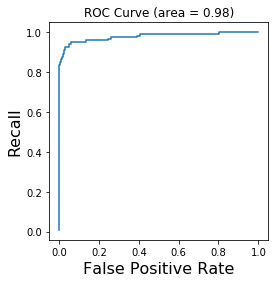

[(0.0, 0.0082644628099173556), (0.0, 0.16528925619834711), (0.0, 0.18181818181818182), (0.0, 0.83471074380165289), (0.0026954177897574125, 0.83471074380165289), (0.0026954177897574125, 0.85123966942148765), (0.0080862533692722376, 0.85123966942148765), (0.0080862533692722376, 0.85950413223140498), (0.01078167115902965, 0.85950413223140498), (0.01078167115902965, 0.86776859504132231), (0.016172506738544475, 0.86776859504132231), (0.016172506738544475, 0.87603305785123964), (0.018867924528301886, 0.87603305785123964), (0.018867924528301886, 0.8925619834710744), (0.024258760107816711, 0.8925619834710744), (0.024258760107816711, 0.90909090909090906), (0.032345013477088951, 0.90909090909090906), (0.032345013477088951, 0.92561983471074383), (0.051212938005390833, 0.92561983471074383), (0.051212938005390833, 0.94214876033057848), (0.059299191374663072, 0.94214876033057848), (0.059299191374663072, 0.95041322314049592), (0.13746630727762804, 0.95041322314049592), (0.13746630727762804, 0.9586776

In [60]:
# Undersampling fraudulent transactions
transNotFraudUSDF=transNotFraudDF.sample(n=transFraudCount*3,random_state=0)

# Forming a new dataset with undersampled majority class
transNewDF=pd.concat([transNotFraudUSDF,transFraudDF])

X = transNewDF[cols[1:30]]
y = transNewDF[cols[30]]

# Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) 

# Checking fraction of fradulant samples in training and test datasets

print(y.sum()/y.count(),y_train.sum()/y_train.count(),y_test.sum()/y_test.count())
print(y.sum(),y_train.sum(),y_test.sum())

# Scaling input feature vectors
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
print(str(datetime.datetime.now()))
modelSVCScaled=SVC()
modelSVCScaled.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

# Evaluating the model
y_predicted_train_SVCScaled=modelSVCScaled.predict(X_train_scaled)
y_predicted_test_SVCScaled=modelSVCScaled.predict(X_test_scaled)

print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVCScaled))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVCScaled))
print('train set precision =',precision_score(y_train,y_predicted_train_SVCScaled))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVCScaled))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVCScaled))
print('test set precision =',precision_score(y_test,y_predicted_test_SVCScaled))

y_scores_test_SVCScaled=modelSVCScaled.decision_function(X_test_scaled)
fpr_SVCScaled,recall_SVCScaled,_= roc_curve(y_test,y_scores_test_SVCScaled)
roc_auc_SVCScaled = auc(fpr_SVCScaled,recall_SVCScaled)

plt.plot(fpr_SVCScaled, recall_SVCScaled)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVCScaled))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()
print(list(zip(fpr_SVCScaled,recall_SVCScaled)))

# Parameter tuning

grid_modelSVCScaled=SVC()

grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1]}

print(str(datetime.datetime.now()))
grid_modelSVCScaled_auc = GridSearchCV(grid_modelSVCScaled, param_grid = grid_values, scoring = 'roc_auc')
grid_modelSVCScaled_auc.fit(X_train_scaled, y_train)
print(str(datetime.datetime.now()))
y_decision_fn_scores_auc = grid_modelSVCScaled_auc.decision_function(X_test_scaled) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_modelSVCScaled_auc.best_params_)
print('Grid best score (AUC): ', grid_modelSVCScaled_auc.best_score_)

###### svm classifier with normalized input vectors; Using Undersampling (1:10 Class Ratios); 

0.0909090909091 0.0933727519093 0.0835181079084
492 379 113
2018-06-04 09:28:52.527372
2018-06-04 09:28:52.670122
train set sensitivity = 0.788918205805
train set accuracy = 0.980290711998
train set precision = 1.0
test set sensitivity = 0.761061946903
test set accuracy = 0.980044345898
test set precision = 1.0


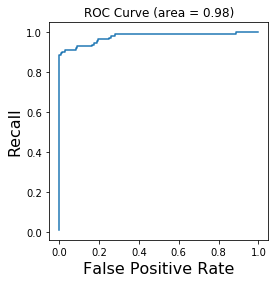

In [58]:
# Undersampling fraudulent transactions
transNotFraudUSDF=transNotFraudDF.sample(n=transFraudCount*10,random_state=0)

# Forming a new dataset with undersampled majority class
transNewDF=pd.concat([transNotFraudUSDF,transFraudDF])

X = transNewDF[cols[1:30]]
y = transNewDF[cols[30]]

# Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) 

# Checking fraction of fradulant samples in training and test datasets

print(y.sum()/y.count(),y_train.sum()/y_train.count(),y_test.sum()/y_test.count())
print(y.sum(),y_train.sum(),y_test.sum())

# Scaling input feature vectors
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model
print(str(datetime.datetime.now()))
modelSVCScaled=SVC()
modelSVCScaled.fit(X_train_scaled,y_train)
print(str(datetime.datetime.now()))

# Evaluating the model
y_predicted_train_SVCScaled=modelSVCScaled.predict(X_train_scaled)
y_predicted_test_SVCScaled=modelSVCScaled.predict(X_test_scaled)

print('train set sensitivity =',recall_score(y_train,y_predicted_train_SVCScaled))
print('train set accuracy =',accuracy_score(y_train,y_predicted_train_SVCScaled))
print('train set precision =',precision_score(y_train,y_predicted_train_SVCScaled))
print('test set sensitivity =',recall_score(y_test,y_predicted_test_SVCScaled))
print('test set accuracy =',accuracy_score(y_test,y_predicted_test_SVCScaled))
print('test set precision =',precision_score(y_test,y_predicted_test_SVCScaled))

y_scores_test_SVCScaled=modelSVCScaled.decision_function(X_test_scaled)
fpr_SVCScaled,recall_SVCScaled,_= roc_curve(y_test,y_scores_test_SVCScaled)
roc_auc_SVCScaled = auc(fpr_SVCScaled,recall_SVCScaled)

plt.plot(fpr_SVCScaled, recall_SVCScaled)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('ROC Curve (area = {:0.2f})'.format(roc_auc_SVCScaled))
ax=plt.gca()
ax.set_aspect('equal')
plt.show()